In [39]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

# spacy
import spacy

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [4]:
with open('../data_files/doc_matrix_df.pickle', 'rb') as read_file:
    doc_matrix_df = pickle.load(read_file)

In [5]:
doc_matrix_df.head()

,tweet,label,one,two,three,four,five,six
0,#IslamKills Are you trying to say that there w...,six,0.016754,0.016737,0.016744,0.016790,0.016746,0.916230
1,"Clinton: Trump should’ve apologized more, atta...",four,0.027954,0.028126,0.027823,0.860040,0.028074,0.027984
2,RT @ltapoll: Who was/is the best president of ...,five,0.042152,0.041668,0.042069,0.042107,0.789804,0.042199
3,RT @jww372: I don't have to guess your religio...,one,0.831839,0.034092,0.033443,0.033333,0.033442,0.033851
4,RT @Shareblue: Pence and his lawyers decided w...,four,0.023893,0.023874,0.023912,0.880432,0.023982,0.023907


In [10]:
doc_topic = doc_matrix_df[['one', 'two', 'three', 'four', 'five', 'six']].values

In [11]:
doc_topic

array([[0.01675371, 0.01673653, 0.01674448, 0.01678994, 0.01674582,
        0.91622953],
       [0.02795393, 0.02812606, 0.02782292, 0.86003962, 0.0280738 ,
        0.02798367],
       [0.0421523 , 0.04166824, 0.04206904, 0.04210744, 0.78980418,
        0.0421988 ],
       ...,
       [0.88001883, 0.02402086, 0.02383027, 0.02402325, 0.02413116,
        0.02397562],
       [0.0242457 , 0.02398096, 0.21105365, 0.69263077, 0.02391857,
        0.02417035],
       [0.42841329, 0.01870377, 0.49710718, 0.01858861, 0.01863595,
        0.0185512 ]])

## TSNE

In [13]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='pca')

In [14]:
# 14D --> 2D
tsne_lda = tsne_model.fit_transform(doc_topic) # doc_topic is document-topic matrix from LDA or GuidedLDA

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203482 samples in 0.245s...
[t-SNE] Computed neighbors for 203482 samples in 9.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 203482
[t-SNE] Computed conditional probabilities for sample 2000 / 203482
[t-SNE] Computed conditional probabilities for sample 3000 / 203482
[t-SNE] Computed conditional probabilities for sample 4000 / 203482
[t-SNE] Computed conditional probabilities for sample 5000 / 203482
[t-SNE] Computed conditional probabilities for sample 6000 / 203482
[t-SNE] Computed conditional probabilities for sample 7000 / 203482
[t-SNE] Computed conditional probabilities for sample 8000 / 203482
[t-SNE] Computed conditional probabilities for sample 9000 / 203482
[t-SNE] Computed conditional probabilities for sample 10000 / 203482
[t-SNE] Computed conditional probabilities for sample 11000 / 203482
[t-SNE] Computed conditional probabilities for sample 12000 / 203482
[t-SNE] Computed conditional probabi

[t-SNE] Computed conditional probabilities for sample 120000 / 203482
[t-SNE] Computed conditional probabilities for sample 121000 / 203482
[t-SNE] Computed conditional probabilities for sample 122000 / 203482
[t-SNE] Computed conditional probabilities for sample 123000 / 203482
[t-SNE] Computed conditional probabilities for sample 124000 / 203482
[t-SNE] Computed conditional probabilities for sample 125000 / 203482
[t-SNE] Computed conditional probabilities for sample 126000 / 203482
[t-SNE] Computed conditional probabilities for sample 127000 / 203482
[t-SNE] Computed conditional probabilities for sample 128000 / 203482
[t-SNE] Computed conditional probabilities for sample 129000 / 203482
[t-SNE] Computed conditional probabilities for sample 130000 / 203482
[t-SNE] Computed conditional probabilities for sample 131000 / 203482
[t-SNE] Computed conditional probabilities for sample 132000 / 203482
[t-SNE] Computed conditional probabilities for sample 133000 / 203482
[t-SNE] Computed con

In [75]:
from itertools import cycle 

def plot_tsne(data, target, target_names):
    
    plt.figure(figsize=(10, 8))
    colors = cycle(['b', 'g', 'r', 'c', 'm', 'y'])
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1], c=c, label=label, s=0.5, alpha=0.6)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right')
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[1]._sizes = [50]
    lgnd.legendHandles[2]._sizes = [50]
    lgnd.legendHandles[3]._sizes = [50]
    lgnd.legendHandles[4]._sizes = [50]
    lgnd.legendHandles[5]._sizes = [50]
    
    plt.show();

In [20]:
target = doc_matrix_df['label']
target_names = list(target.unique())

In [21]:
print(len(target))
print(len(tsne_lda))

203482
203482


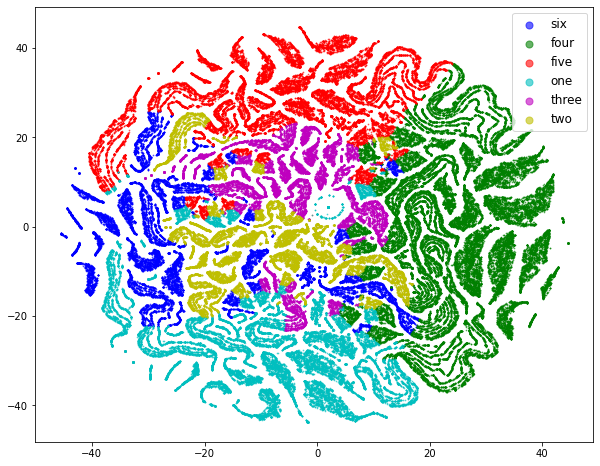

In [76]:
plot_tsne(tsne_lda, target, target_names)

## PCA

In [40]:
%%time

pca = PCA(n_components=2)
pca_features = pca.fit_transform(doc_topic)

CPU times: user 2.15 s, sys: 250 ms, total: 2.4 s
Wall time: 233 ms


In [71]:
def plot_PCA(data, target, target_names):
    colors = cycle(['b', 'g', 'r', 'c', 'm', 'y'])
    plt.figure(figsize=(10,10))
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1],
                   c=c, label=label, alpha=0.5, s=.75)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right')
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[1]._sizes = [50]
    lgnd.legendHandles[2]._sizes = [50]
    lgnd.legendHandles[3]._sizes = [50]
    lgnd.legendHandles[4]._sizes = [50]
    lgnd.legendHandles[5]._sizes = [50]

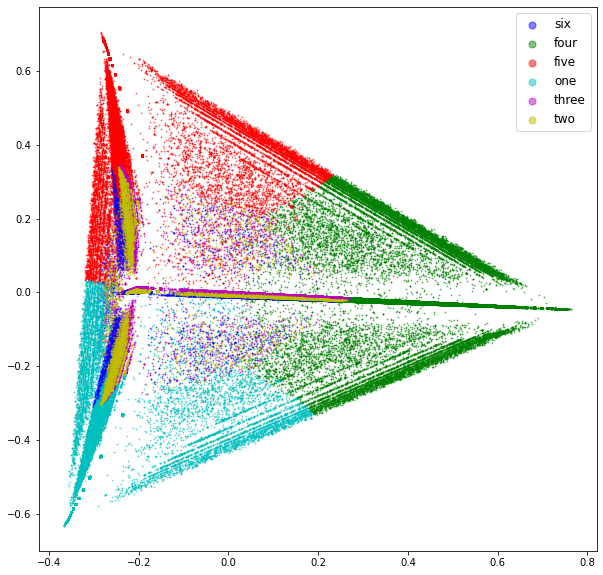

In [72]:
plot_PCA(pca_features, target=target, target_names=target_names)